In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import services.data_prep as data_prep
#import pandasql as psql

# DATASET 1 

In [2]:
# dataset 1 

#%%
'''import libraries'''
import pandas as pd
import numpy as np
from service import *

#%%
'''baca file'''  
data_bank=pd.read_csv(r"/home/yusuf/hyperparameter-tuning-benchmark/Data_Preprocessing/dataset-raw/bank-full.csv",sep=';')
data_bank.info()

#%%
'''hapus kolom duration'''
data_bank=data_bank.drop(['duration'],axis=1)
# berdasarkan https://archive.ics.uci.edu/ml/datasets/Bank+Marketing, disarankan duration dihapus 

#%% 
'''banyak nilai kategori di tiap fitur kategorikal''' 
# banyak_tiap_kategori(data_bank)

#%% 
'''ubah nilai unknown menjadi nilai yang paling sering muncul'''
data_bank['job']=data_bank['job'].replace(['unknown'],'blue-collar')
data_bank['education']=data_bank['education'].replace(['unknown'],'secondary')
data_bank['contact']=data_bank['contact'].replace(['unknown'],'cellular')

#%%
'''hapus kolom poutcome'''
data_bank=data_bank.drop(['poutcome'],axis=1)

#%%
'''pengelompokan nilai kategori pada fitur job'''
data_bank['job']=data_bank['job'].replace(['management','entrepreneur'],'high')
data_bank['job']=data_bank['job'].replace(['blue-collar','technician','services','self-employed'],'mid')
data_bank['job']=data_bank['job'].replace(['unemployed','housemaid','student','admin.','retired'],'low')

'''pengelompokan nilai kategori pada fitur month'''
data_bank['month']=data_bank['month'].replace(['jan','feb','mar','apr','may','jun'],'semester-1')
data_bank['month']=data_bank['month'].replace(['jul','aug','sep','oct','nov','dec'],'semester-2')

#%%
## untuk catboost ini tidak perlu dilakukan...
'''label encoding pada fitur education'''
kategori=['primary','secondary','tertiary']
label=[1,2,3]
data_bank['education']=data_bank['education'].replace(kategori,label)

#%%
'''dimensi data sebelum transformasi'''
X,y=pisah_x_y(data_bank)
# print("before transform")
# print("y= ",y.shape)
# print("X= ",X.shape)
#%%
'''transformasi data'''
numerical_minmax=['age','balance','day','campaign','pdays','previous']
categorical_onehot=['job','marital','default','housing','loan','contact','month']
y=transform_kelas(y)
X=transform_fitur(X,numerical_minmax,categorical_onehot) # xgboost dan lightgbm


#%%
# print("dimensi data setelah transformasi")
# print("y= ",y.shape)
# print("X= ",X.shape)

#%%
'''export data'''
#ekspor_data(X,y,"X-bank","y-bank")



ModuleNotFoundError: No module named 'service'

# DATASET 2 

In [ ]:
data=pd.read_csv(r"/home/yusuf/hyperparameter-tuning-benchmark/Data_Preprocessing/dataset-raw/cus_seg.csv")

## EDA

In [ ]:
data.head(10)

In [ ]:
data.size

In [ ]:

print(data['Segmentation'].unique())

In [ ]:
print(data['Segmentation'].value_counts())

In [ ]:
A=(data['Segmentation']=='A').sum()
B=(data['Segmentation']=='B').sum()
C=(data['Segmentation']=='C').sum()
D=(data['Segmentation']=='D').sum()

In [ ]:
y=np.array([A,B,C,D])
mylabels=["A","B","C","D"]
fig = plt.figure(figsize =(10, 7)) 
plt.pie(y,labels=mylabels,autopct='%1.1f%%')
plt.show()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
# feature column, ID dan segmentation bukan feature 
feature_cols=data.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Segmentation')
feature_cols

In [ ]:
# ada 9 fitur dan dari 9 fitur ada 6 fitur yang memiliki nilai NaN

## Handle Missing Values

### 1. Ever_Married

In [ ]:
# ubah NaN jadi nilai yang most frequent  
print("Nilai unik= ",data["Ever_Married"].unique(),"\n")
print(data['Ever_Married'].value_counts(),"\n")
print("jumlah NaN values= ",data['Ever_Married'].isna().sum(),"\n")
data['Ever_Married']=data['Ever_Married'].fillna('Yes')
print(data['Ever_Married'].value_counts(),"\n")

### 2. Graduated

In [ ]:
# ubah NaN jadi nilai yang most frequent  
print("Nilai unik= ",data["Graduated"].unique(),"\n")
print(data['Graduated'].value_counts(),"\n")
print("jumlah NaN values= ",data['Graduated'].isna().sum(),"\n")
data['Graduated']=data['Graduated'].fillna('Yes')
print(data['Graduated'].value_counts(),"\n")

### 3. Profession

In [ ]:
# ubah NaN jadi nilai yang most frequent  
print("Nilai unik= ",data["Profession"].unique(),"\n")
print(data['Profession'].value_counts(),"\n")
print("jumlah NaN values= ",data['Profession'].isna().sum(),"\n")
data['Profession']=data['Profession'].fillna('Artist')
print(data['Profession'].value_counts(),"\n")

### 4. Work Experience

In [ ]:
# ubah nilai NaN jadi nilai rata2nya 
kolom='Work_Experience'
print("Nilai unik= ",data[kolom].unique(),"\n")
print(data[kolom].value_counts(),"\n")

In [ ]:
print("jumlah NaN values= ",data[kolom].isna().sum(),"\n")

In [ ]:
rata_rata=round(data[kolom].mean(),1)
print("nilai rata-rata= ", rata_rata,"\n")
data[kolom]=data[kolom].fillna(rata_rata)
print(data[kolom].value_counts(),"\n")

### 5. Family Size 

In [ ]:
# ubah nilai NaN jadi nilai rata2nya 
kolom='Family_Size'
print("Nilai unik= ",data[kolom].unique(),"\n")
print(data[kolom].value_counts(),"\n")


In [ ]:
print("jumlah NaN values= ",data[kolom].isna().sum(),"\n")

In [ ]:
rata_rata=round(data[kolom].mean(),1)
print("nilai rata-rata= ", rata_rata,"\n")
data[kolom]=data[kolom].fillna(rata_rata)
print(data[kolom].value_counts(),"\n")

### 6. Var_1

In [ ]:
# ubah NaN jadi nilai yang most frequent  
kolom='Var_1'
print("Nilai unik= ",data[kolom].unique(),"\n")
print(data[kolom].value_counts(),"\n")

In [ ]:
print("jumlah NaN values= ",data[kolom].isna().sum(),"\n")

In [ ]:
data[kolom]=data[kolom].fillna('Cat_6')
print(data[kolom].value_counts(),"\n")

In [ ]:
data.info()

## Normalization and Encoding

In [ ]:
# untuk data numerical = min max scaler 
# untuk data kategorikal = label and one hot encoding 
# khusus untuk catboost = gk perlu one hot encoding, biarkan apa adanya, gk perlu diubah jadi numerikal jg 

In [ ]:
df_fitur=data.drop(columns=['ID', 'Segmentation'])
df_kelas=data[['Segmentation']]

In [ ]:
df_fitur.info()

In [ ]:
df_kelas.info()

In [ ]:
y=LabelEncoder().fit_transform(df_kelas)

In [ ]:
y

In [ ]:
# hitung banyak kategori tiap fitur kategorikal 
categorical_ix = df_fitur.select_dtypes(include=['object']).columns 
sum=0
for i in categorical_ix:
    print(i,"=",len(df_fitur[i].unique())," kategori")
    sum=sum+len(df_fitur[i].unique())
print("\ntotal kategori= ",sum)

In [ ]:
# cek 
df_fitur['Profession'].unique()

In [ ]:
df_fitur.info()

In [ ]:
categorical_onehot=["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1"]
numerical_col=["Age","Work_Experience","Family_Size"]

t = [('cat', OneHotEncoder(sparse=False), categorical_onehot),('num', MinMaxScaler(), numerical_col)]
col_transform = ColumnTransformer(transformers=t,remainder='passthrough')
X=col_transform.fit_transform(df_fitur)

In [ ]:
# untuk catboost 
t = [('num', MinMaxScaler(), numerical_col)]
col_transform = ColumnTransformer(transformers=t,remainder='passthrough')
X_catboost=col_transform.fit_transform(df_fitur)

In [ ]:
X_catboost.shape

In [ ]:
X.shape

In [ ]:
y.shape

## Save File

In [ ]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

X.to_csv('dataset-ready/'+'X_cus_seg'+'.csv',index=False,header=None)
y.to_csv('dataset-ready/'+'y_cus_seg'+'.csv',index=False,header=None)

In [ ]:
X_catboost=pd.DataFrame(X_catboost)

X_catboost.to_csv('dataset-ready/'+'X_cus_seg_catboost'+'.csv',index=False,header=None)

# DATASET 3

Langkah-langkah praproses dataset 3 :
- baca data : baca juga metadata data dari sumbernya 
- EDA :
    - cek ada null data gk 
    - pisah data feature dan data target. 
    - data target udah fix, gk perlu ada praproses lagi 
    - menentukan feature yang numerikal dan kategorikal 
    - cek yang numerikal ada yang outlier bangettt gk, hapus kalau ada jika data tsb gk banyak
- Feature Engineering/transformasi :
    - cek tiap fitur, ada persebaran data yang extreme gk 
    - pertimbangkan buat hapus fitur kalau ada yang binary categorical dan 1 nilai sangat2 dominan 
    - ada nilai kategori bisa di grouping gk 
    - buat kopi dari data fitur (untuk catboost karena gk perlu OHE) 
    - lakukan one hot encoding untuk yang kategorikal 
    
    - lakukan min max scaler untuk yang numerikal 
    - nilai hasil minmax scaler bulatkan ke 3-6 angkan belakang koma biar komputasi gk berat2 amat 

    

## baca data

In [2]:
data=pd.read_csv("dataset_raw/house_price.csv")

In [3]:
data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

POSTED_BY =>	Category marking who has listed the property

UNDER_CONSTRUCTION =>	Under Construction or Not

RERA =>	Rera approved or Not

BHK_NO =>	Number of Rooms

BHKORRK	Type => of property

SQUARE_FT =>	Total area of the house in square feet

READYTOMOVE =>	Category marking Ready to move or Not

RESALE =>	Category marking Resale or not

ADDRESS =>	Address of the property

LONGITUDE =>	Longitude of the property

LATITUDE =>	Latitude of the property

## EDA
- cek ukuran data 
- tentukan fitur kategorikal, fitur numerikal, dan target value
- cek nilai unik tiap fitur, kalau jumlahnya ada yang sangat sedikit, bisa dipertimbangkan untuk dihapus fiturnya 
- cek ada missing values gk 

In [4]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,3.000000,1,1,"industrial area,Hajipur",23.525713,87.287479,12.0
1,Owner,0,0,2,BHK,3.985594,1,1,"Amlidih,Raipur",21.213822,81.676956,24.9
2,Owner,0,0,2,BHK,5.000000,1,1,"Sector-29 Chandigarh,Chandigarh",30.755000,76.777256,45.0
3,Owner,0,0,2,BHK,9.397110,1,1,"Brajanathchak,Haldia",22.030000,88.060000,32.5
4,Owner,0,0,1,BHK,10.000000,1,1,"Punagam,Surat",21.216630,72.899374,8.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


dari data ini dapat disimpulkan 
- tidak ada missing values 
- ukuran data : 29451 x 12 

In [6]:
# data dengan tipe data object sudah pasti kategorikal 
cat_features_string=["POSTED_BY","BHK_OR_RK","ADDRESS"]

# data dengan tipe data float sudah pasti numerikal 
num_features=["SQUARE_FT","LONGITUDE","LATITUDE"]

# data dengan tipe integer bisa jadi kategorikal juga. cara menentukan : lihat definisi data dan nilai unique-nya 
'''
features dengan nilai int:

UNDER_CONSTRUCTION = Under Construction or Not

RERA  = approved or Not

READYTOMOVE = Category marking Ready to move or Not

RESALE Category = marking Resale or not

BHK_NO = Number of Rooms

'''
# dari definisi di atas terlihat bahwa hanya BHK_NO yang bukan kategorikal 
# kategorikal string dan int harus dipisah karena yang int pada data ini merupakan binary category sehingga sudah tidak 
    # perlu diproses lagi
cat_features_int=["UNDER_CONSTRUCTION","RERA","READY_TO_MOVE","RESALE","BHK_NO."]

In [7]:
# cek jumlah fitur sama 
#len(num_features + cat_features_string + cat_features_int)

In [8]:
#data_prep.calc_unique(X,cat_features_int)

In [9]:
data_prep.calc_unique(data,cat_features_string)

1 .  POSTED_BY ----------------------

nilai unik:  3 

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64 

2 .  BHK_OR_RK ----------------------

nilai unik:  2 

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64 

3 .  ADDRESS ----------------------

nilai unik:  6899 

Zirakpur,Chandigarh              509
Whitefield,Bangalore             230
Raj Nagar Extension,Ghaziabad    215
Sector-137 Noida,Noida           139
New Town,Kolkata                 131
                                ... 
Bamroli,Surat                      1
Panchsheel Colony,Chhindwara       1
Swapna Theater,Vijayawada          1
Khodiyar Nagar,Surat               1
Marripalem,Visakhapatnam           1
Name: ADDRESS, Length: 6899, dtype: int64 



In [10]:
'''
pada fitur BHK_OR_RK nilai RK sangat kecil dan bisa dianggap tidak berdampak dibandingkan nilai BHK. oleh karena hanya ada 2 fitur maka BHK_OR_RK seolah2 hanya terdiri dari 1 nilai yaitu BHK. 
oleh karena itu fitur ini dihapus saja 
'''
data.drop(['BHK_OR_RK'],axis=1,inplace=True)

In [11]:
'''
address ada banyak sekali. harus di grouping
- extract nama city dari tiap address
- buat kolom baru "city"
- kelompokkan berdasarkan https://en.wikipedia.org/wiki/Classification_of_Indian_cities
- hapus kolom ADDRESS
'''
# from ADDRESS : extract city name 
data.insert(10,'city','')
data['city']=data['ADDRESS'].str.split(",").str[-1]

# selain tier_1_cities dan tier_2_cities maka diklasifikasikan sebagai other_cities
tier_1_cities = ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']
tier_2_cities = ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 'Belgaum', 'Bhavnagar', 'Bhiwandi', 
                 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad',
                 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 
                 'Gurgaon', 'Guwahati', 'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                 'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 'Kurnool', 'Ludhiana', 
                 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore',
                 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Salem', 'Sangli', 
                 'Shimla', 'Siliguri', 'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 'Vellore', 'Warangal']

In [12]:
# ganti nilai city berdasarkan tier city nya 
def check_city(x):
    if x in tier_1_cities:
        return "tier_1"
    elif x in tier_2_cities:
        return "tier_2"
    else:
        return "other"
    
data['city']=data['city'].apply(check_city)

In [13]:
# drop ADDRESS karena sudah diganti dengan city
data.drop(['ADDRESS'],axis=1,inplace=True)

In [14]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,city,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,3.000000,1,1,23.525713,87.287479,other,12.0
1,Owner,0,0,2,3.985594,1,1,21.213822,81.676956,tier_2,24.9
2,Owner,0,0,2,5.000000,1,1,30.755000,76.777256,tier_2,45.0
3,Owner,0,0,2,9.397110,1,1,22.030000,88.060000,other,32.5
4,Owner,0,0,1,10.000000,1,1,21.216630,72.899374,tier_2,8.0


In [15]:
posted_by=data["POSTED_BY"]
city=data["city"]

In [16]:
type(posted_by)

pandas.core.series.Series

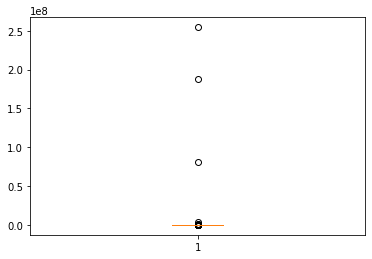

In [17]:
plt.boxplot(data["SQUARE_FT"])
plt.show()

**SQUARE_FT** memiliki range nilai besar dan outlier. hal ini akan menyebabkan hasil dari min max scaler => banyak angka dibelakang koma. dikhawatirkan akan memperlama komputasi 

In [18]:
# jumlah data sebelum dihapus 
data.shape

(29451, 11)

In [19]:
# delete extreme outliers
batas_1=100
batas_2=6000
data=data.drop(data[data["SQUARE_FT"]<batas_1].index)
data=data.drop(data[data["SQUARE_FT"]>batas_2].index)

In [20]:
# jumlah data setelah dihapus 
data.shape

(29166, 11)

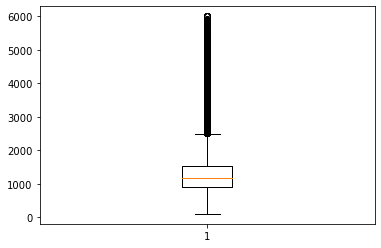

In [21]:
plt.boxplot(data["SQUARE_FT"])
plt.show()

**LONGITUDE** dan **LATITUDE** range antara nilai max dan min tidak terlalu besar. tidak perlu hapus outlier-nya

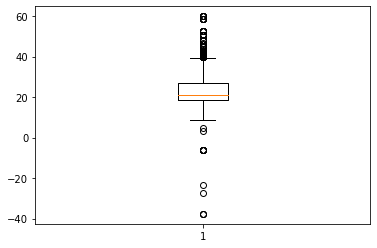

In [22]:
plt.boxplot(data["LONGITUDE"])
plt.show()

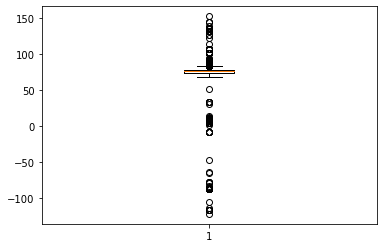

In [23]:
plt.boxplot(data["LATITUDE"])
plt.show()

In [24]:
cat_features_string

['POSTED_BY', 'BHK_OR_RK', 'ADDRESS']

In [25]:
# UPDATE cat_features_string
'''
ADDRESS dihapus karena sudah diganti oleh city
BHK_OR_RK dihapus karena nilai RK sangat kecil 
tambah fitur baru yaitu city
'''
cat_features_string.remove("ADDRESS")
cat_features_string.remove("BHK_OR_RK")
cat_features_string+=["city"]
cat_features_string

['POSTED_BY', 'city']

## feature engineering

cat_features_int : tidak ada preprocess karena data sudah numerikal dan tidak ada yang aneh dengan datanya 

cat_features_string : OHE

num_features : minmax scaler, bulatkan nilainya


In [26]:
'''
pisah antara data fitur dan output
output tidak akan mengalami transformasi apapun
sedangkan data fitur akan mengalami transformasi 
'''
X,y=data_prep.split_x_y(data)

In [27]:
# X_catboost tidak melalui "feature transform untuk cat_feature_string"
X_catboost=X.copy()

In [28]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,city
27,Owner,0,0,3,100.000000,1,1,26.445769,80.304593,tier_2
28,Owner,0,0,2,101.933552,1,1,26.807408,75.838659,tier_2
29,Owner,0,0,5,107.000508,1,1,28.792047,76.153873,other
30,Dealer,0,0,2,124.947224,1,1,12.919423,77.522774,tier_1
31,Owner,0,0,2,150.006819,1,1,27.880000,78.080000,tier_2


### feature transform untuk cat_feature_string

In [29]:
cat_features_string

['POSTED_BY', 'city']

In [30]:
# one hot encoding untuk POSTED_BY

cat_features_string=['POSTED_BY']
X=data_prep.transform_fitur_onehot(X,cat_features_string)
X=pd.DataFrame(X)
X.columns=["POSTED_BY_1","POSTED_BY_2","POSTED_BY_3","UNDER_CONSTRUCTION","RERA","BHK_NO.","SQUARE_FT","READY_TO_MOVE","RESALE","LONGITUDE","LATITUDE","city"]
X.head()


,POSTED_BY_1,POSTED_BY_2,POSTED_BY_3,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,city
0,0,0,1,0,0,3,100,1,1,26.4458,80.3046,tier_2
1,0,0,1,0,0,2,101.934,1,1,26.8074,75.8387,tier_2
2,0,0,1,0,0,5,107.001,1,1,28.792,76.1539,other
3,0,1,0,0,0,2,124.947,1,1,12.9194,77.5228,tier_1
4,0,0,1,0,0,2,150.007,1,1,27.88,78.08,tier_2


In [31]:
# one hot encoding untuk city

cat_features_string=['city']
X=data_prep.transform_fitur_onehot(X,cat_features_string)
X=pd.DataFrame(X)
X.columns=["city_1","city_2","city_3","POSTED_BY_1","POSTED_BY_2","POSTED_BY_3","UNDER_CONSTRUCTION","RERA","BHK_NO.","SQUARE_FT","READY_TO_MOVE","RESALE","LONGITUDE","LATITUDE"]
X.head()

,city_1,city_2,city_3,POSTED_BY_1,POSTED_BY_2,POSTED_BY_3,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0,0,1,0,0,1,0,0,3,100,1,1,26.4458,80.3046
1,0,0,1,0,0,1,0,0,2,101.934,1,1,26.8074,75.8387
2,1,0,0,0,0,1,0,0,5,107.001,1,1,28.792,76.1539
3,0,1,0,0,1,0,0,0,2,124.947,1,1,12.9194,77.5228
4,0,0,1,0,0,1,0,0,2,150.007,1,1,27.88,78.08


### feature transform untuk num_feature

In [32]:
num_features

['SQUARE_FT', 'LONGITUDE', 'LATITUDE']

cek berapa banyak data outlier yang extreme, kalau tidak terlalu banyak hapus saja 

In [33]:
# min max scaler SQUARE_FT

numerical_col=["SQUARE_FT"]
X=data_prep.transform_fitur_minmaxscaler(X,numerical_col)
X=pd.DataFrame(X)
X.columns=["SQUARE_FT","city_1","city_2","city_3","POSTED_BY_1","POSTED_BY_2","POSTED_BY_3","UNDER_CONSTRUCTION","RERA","BHK_NO.","READY_TO_MOVE","RESALE","LONGITUDE","LATITUDE"]
X.head()

,SQUARE_FT,city_1,city_2,city_3,POSTED_BY_1,POSTED_BY_2,POSTED_BY_3,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0,0,0,1,0,0,1,0,0,3,1,1,26.4458,80.3046
1,0.000327721,0,0,1,0,0,1,0,0,2,1,1,26.8074,75.8387
2,0.00118653,1,0,0,0,0,1,0,0,5,1,1,28.792,76.1539
3,0.00422834,0,1,0,0,1,0,0,0,2,1,1,12.9194,77.5228
4,0.00847573,0,0,1,0,0,1,0,0,2,1,1,27.88,78.08


In [34]:
#pembulatan
'''
ketika di one hot encoding pakai ColumnTransform, return berupa array 
lalu dari array diubah ke DataFrame. Pandas gk tau tipe datanya. Jadi otomatis tipe data berupa object 
oleh
'''
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29166 entries, 0 to 29165
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SQUARE_FT           29166 non-null  object
 1   city_1              29166 non-null  object
 2   city_2              29166 non-null  object
 3   city_3              29166 non-null  object
 4   POSTED_BY_1         29166 non-null  object
 5   POSTED_BY_2         29166 non-null  object
 6   POSTED_BY_3         29166 non-null  object
 7   UNDER_CONSTRUCTION  29166 non-null  object
 8   RERA                29166 non-null  object
 9   BHK_NO.             29166 non-null  object
 10  READY_TO_MOVE       29166 non-null  object
 11  RESALE              29166 non-null  object
 12  LONGITUDE           29166 non-null  object
 13  LATITUDE            29166 non-null  object
dtypes: object(14)
memory usage: 3.1+ MB


In [35]:
X["SQUARE_FT"] = X["SQUARE_FT"].astype(float)

In [36]:
X=X.round({"SQUARE_FT":5})
X.head()

,SQUARE_FT,city_1,city_2,city_3,POSTED_BY_1,POSTED_BY_2,POSTED_BY_3,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0.00000,0,0,1,0,0,1,0,0,3,1,1,26.4458,80.3046
1,0.00033,0,0,1,0,0,1,0,0,2,1,1,26.8074,75.8387
2,0.00119,1,0,0,0,0,1,0,0,5,1,1,28.792,76.1539
3,0.00423,0,1,0,0,1,0,0,0,2,1,1,12.9194,77.5228
4,0.00848,0,0,1,0,0,1,0,0,2,1,1,27.88,78.08


In [37]:
# min max scaler LONGITUDE

numerical_col=["LONGITUDE"]
X=data_prep.transform_fitur_minmaxscaler(X,numerical_col)
X=pd.DataFrame(X)
X.columns=["LONGITUDE","SQUARE_FT","city_1","city_2","city_3","POSTED_BY_1","POSTED_BY_2","POSTED_BY_3","UNDER_CONSTRUCTION","RERA","BHK_NO.","READY_TO_MOVE","RESALE","LATITUDE"]
X.head()

,LONGITUDE,SQUARE_FT,city_1,city_2,city_3,POSTED_BY_1,POSTED_BY_2,POSTED_BY_3,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,LATITUDE
0,0.65719,0,0,0,1,0,0,1,0,0,3,1,1,80.3046
1,0.660895,0.00033,0,0,1,0,0,1,0,0,2,1,1,75.8387
2,0.681224,0.00119,1,0,0,0,0,1,0,0,5,1,1,76.1539
3,0.518637,0.00423,0,1,0,0,1,0,0,0,2,1,1,77.5228
4,0.671881,0.00848,0,0,1,0,0,1,0,0,2,1,1,78.08


In [38]:
X["LONGITUDE"] = X["LONGITUDE"].astype(float)

In [39]:
X=X.round({"LONGITUDE":3})
X.head()

,LONGITUDE,SQUARE_FT,city_1,city_2,city_3,POSTED_BY_1,POSTED_BY_2,POSTED_BY_3,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,LATITUDE
0,0.657,0,0,0,1,0,0,1,0,0,3,1,1,80.3046
1,0.661,0.00033,0,0,1,0,0,1,0,0,2,1,1,75.8387
2,0.681,0.00119,1,0,0,0,0,1,0,0,5,1,1,76.1539
3,0.519,0.00423,0,1,0,0,1,0,0,0,2,1,1,77.5228
4,0.672,0.00848,0,0,1,0,0,1,0,0,2,1,1,78.08


In [40]:
# min max scaler LATITUDE

numerical_col=["LATITUDE"]
X=data_prep.transform_fitur_minmaxscaler(X,numerical_col)
X=pd.DataFrame(X)
X.columns=["LATITUDE","LONGITUDE","SQUARE_FT","city_1","city_2","city_3","POSTED_BY_1","POSTED_BY_2","POSTED_BY_3","UNDER_CONSTRUCTION","RERA","BHK_NO.","READY_TO_MOVE","RESALE"]
X.head()

,LATITUDE,LONGITUDE,SQUARE_FT,city_1,city_2,city_3,POSTED_BY_1,POSTED_BY_2,POSTED_BY_3,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE
0,0.735523,0.657,0,0,0,1,0,0,1,0,0,3,1,1
1,0.719267,0.661,0.00033,0,0,1,0,0,1,0,0,2,1,1
2,0.720415,0.681,0.00119,1,0,0,0,0,1,0,0,5,1,1
3,0.725397,0.519,0.00423,0,1,0,0,1,0,0,0,2,1,1
4,0.727426,0.672,0.00848,0,0,1,0,0,1,0,0,2,1,1


In [41]:
X["LATITUDE"] = X["LATITUDE"].astype(float)
X=X.round({"LATITUDE":3})
X.head()

,LATITUDE,LONGITUDE,SQUARE_FT,city_1,city_2,city_3,POSTED_BY_1,POSTED_BY_2,POSTED_BY_3,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE
0,0.736,0.657,0,0,0,1,0,0,1,0,0,3,1,1
1,0.719,0.661,0.00033,0,0,1,0,0,1,0,0,2,1,1
2,0.720,0.681,0.00119,1,0,0,0,0,1,0,0,5,1,1
3,0.725,0.519,0.00423,0,1,0,0,1,0,0,0,2,1,1
4,0.727,0.672,0.00848,0,0,1,0,0,1,0,0,2,1,1


In [42]:
# untuk yang catboost 

X_catboost=X.copy()
X_catboost.drop(["city_1","city_2","city_3","POSTED_BY_1","POSTED_BY_2","POSTED_BY_3"],axis=1,inplace=True)
X_catboost.head()

,LATITUDE,LONGITUDE,SQUARE_FT,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE
0,0.736,0.657,0,0,0,3,1,1
1,0.719,0.661,0.00033,0,0,2,1,1
2,0.720,0.681,0.00119,0,0,5,1,1
3,0.725,0.519,0.00423,0,0,2,1,1
4,0.727,0.672,0.00848,0,0,2,1,1


In [43]:
X_catboost["city"]=city
X_catboost["POSTED_BY"]=posted_by


In [44]:
X_catboost.head()

,LATITUDE,LONGITUDE,SQUARE_FT,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,city,POSTED_BY
0,0.736,0.657,0,0,0,3,1,1,other,Owner
1,0.719,0.661,0.00033,0,0,2,1,1,tier_2,Owner
2,0.720,0.681,0.00119,0,0,5,1,1,tier_2,Owner
3,0.725,0.519,0.00423,0,0,2,1,1,other,Owner
4,0.727,0.672,0.00848,0,0,2,1,1,tier_2,Owner


In [45]:
X_catboost.shape

(29166, 10)

In [46]:
X.head()

,LATITUDE,LONGITUDE,SQUARE_FT,city_1,city_2,city_3,POSTED_BY_1,POSTED_BY_2,POSTED_BY_3,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE
0,0.736,0.657,0,0,0,1,0,0,1,0,0,3,1,1
1,0.719,0.661,0.00033,0,0,1,0,0,1,0,0,2,1,1
2,0.720,0.681,0.00119,1,0,0,0,0,1,0,0,5,1,1
3,0.725,0.519,0.00423,0,1,0,0,1,0,0,0,2,1,1
4,0.727,0.672,0.00848,0,0,1,0,0,1,0,0,2,1,1


In [47]:
X.shape

(29166, 14)

In [48]:
y.shape

(29166, 1)

In [54]:
y["TARGET(PRICE_IN_LACS)"].min()

0.25

In [53]:
y["TARGET(PRICE_IN_LACS)"].max()

6000.0

In [1624]:
X.to_csv('dataset_ready/'+'X_house_price'+'.csv',index=False,header=None)
X_catboost.to_csv('dataset_ready/'+'X_house_price_catboost'+'.csv',index=False,header=None)
y.to_csv('dataset_ready/'+'y_house_price'+'.csv',index=False,header=None)